# 原始数据

Text(0.5, 1.0, 'Histogram of cost')

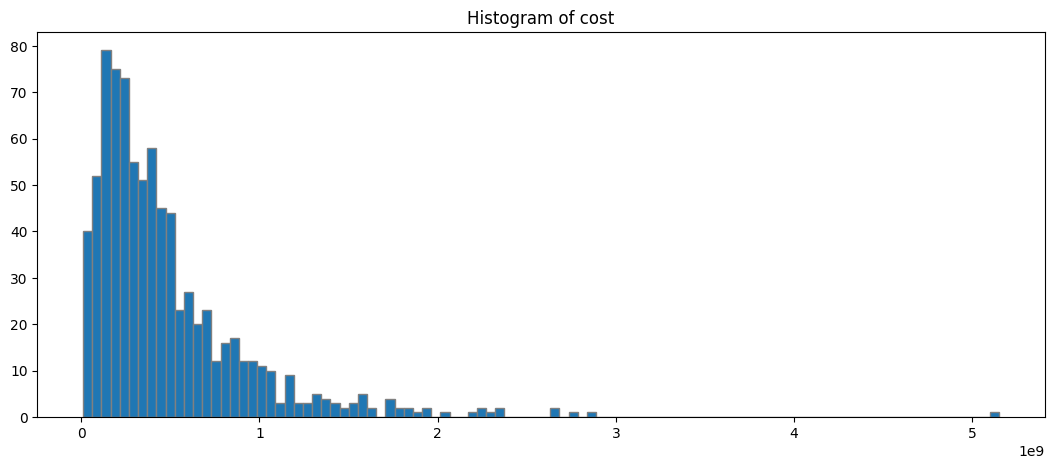

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series

df = pd.read_excel('县公司购电成本.xlsx')
fig, ax = plt.subplots(1, 1, figsize=(13, 5))
bins = ax.hist(df['指标值（元）'], bins=100, edgecolor='grey')
ax.set_title('Histogram of cost')

# MAD法

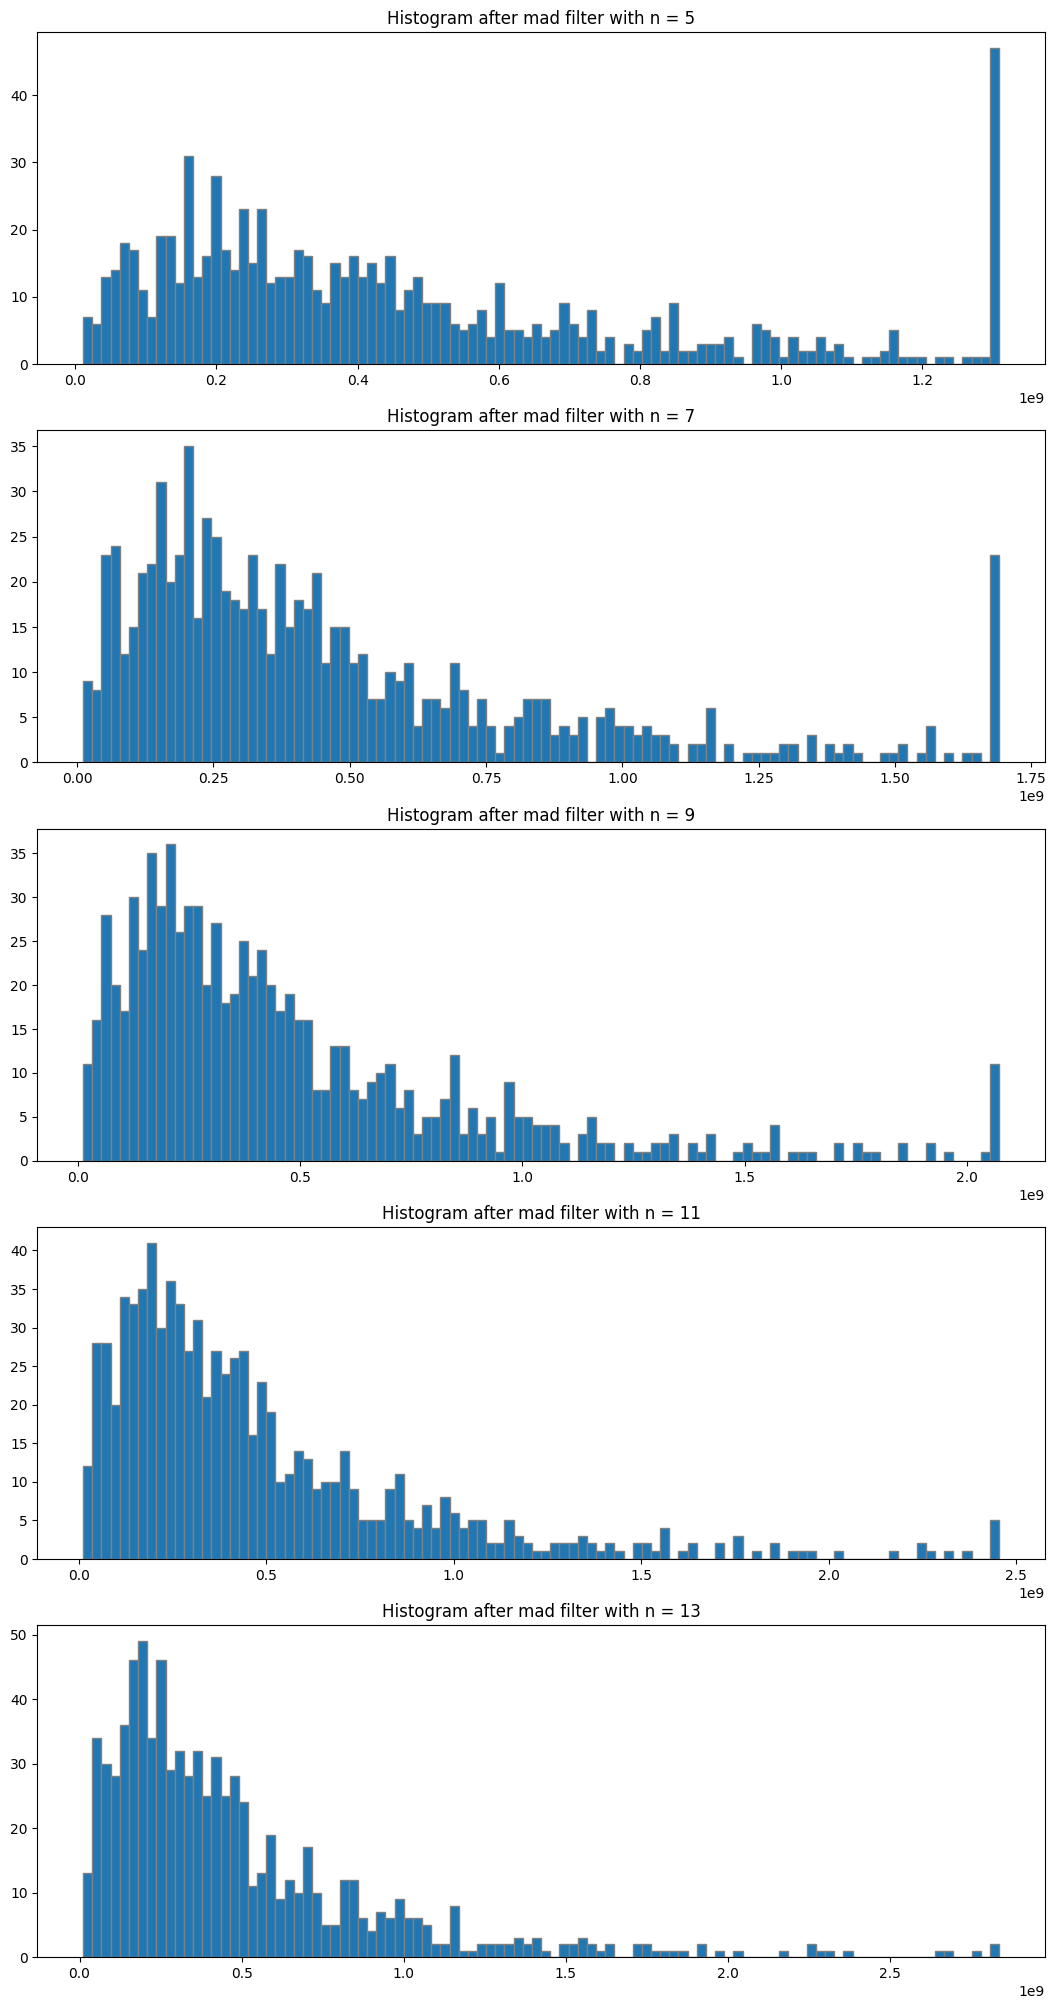

In [17]:
def filter_extreme_mad(x: Series, n):
    median = x.quantile(0.5)
    new_median = ((x - median).abs()).quantile(0.5)
    max_range = median + n * new_median
    min_range = median - n * new_median
    return np.clip(x, min_range, max_range)
fig, axes = plt.subplots(5, 1, figsize=(13, 25))
for ax, i in zip(axes, [5, 7, 9, 11, 13]):
    df_filtered = filter_extreme_mad(df['指标值（元）'], i)
    ax.hist(df_filtered, bins = 100, edgecolor='grey')
    ax.set_title(f'Histogram after mad filter with n = {i}')

# 3σ法

Text(0.5, 1.0, 'Histogram after 3σ filter with n = 13')

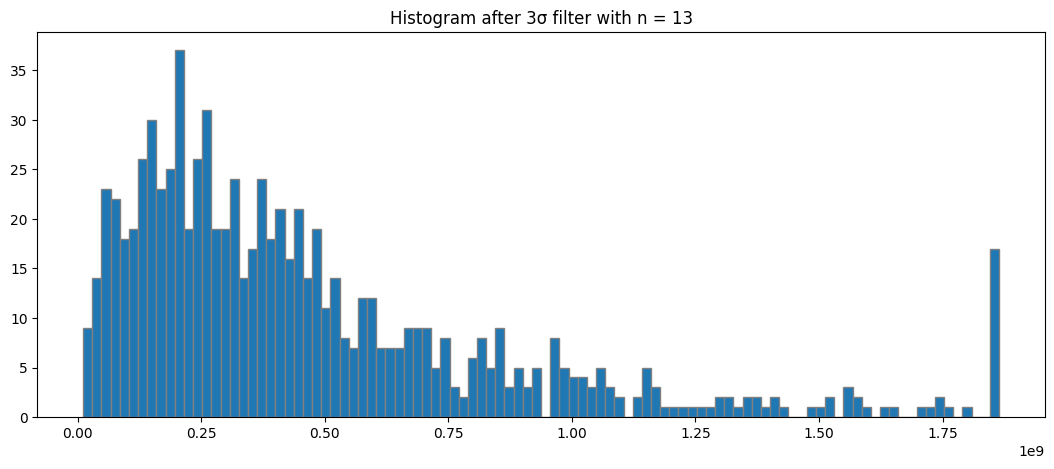

In [20]:
def filter_extreme_3sigma(x: Series, n=3):
    median = x.mean()
    std = x.std()
    max_range = median + n * std
    min_range = median - n * std
    return np.clip(x, min_range, max_range)
fig, ax = plt.subplots(figsize=(13, 5))
df_filtered = filter_extreme_3sigma(df['指标值（元）'])
ax.hist(df_filtered, bins = 100, edgecolor='grey')
ax.set_title(f'Histogram after 3σ filter with n = {i}')


# 百分位法

Text(0.5, 1.0, 'Histogram after percentile filter with n = 13')

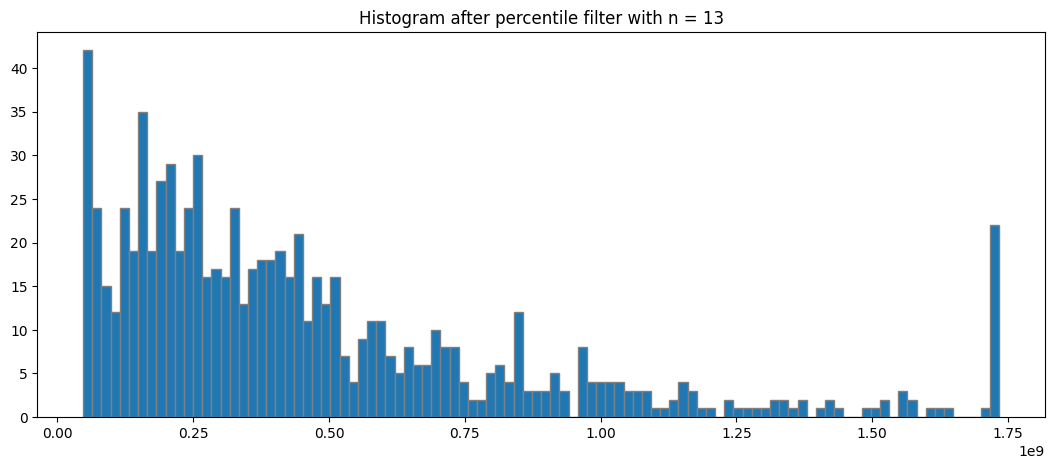

In [30]:
def filter_extreme_percentile(x, min=0.025, max=0.975):
    quantiles = x.quantile([min, max])
    return np.clip(x, quantiles[min], quantiles[max])
fig, ax = plt.subplots(figsize=(13, 5))
df_filtered = filter_extreme_percentile(df['指标值（元）'])
ax.hist(df_filtered, bins = 100, edgecolor='grey')
ax.set_title(f'Histogram after percentile filter with n = {i}')
